# Data Wrangling II

Create an 'Academic Performance' dataset of students and perform the following operations using python.

1.Scan all variables for missing values and inconsisitencies.If there are missing values and/or inconsistencies, use any of the suitable technique to deal with them.

2.Scan all numeric variables for outliers.If there are outliers, use any of the suitable technique to deal with them.

3.Apply data transformation on at least one of the variables.The purpose of this transformation should be one of the following reasons: to change the scale for better understanding of the variable,to convert a non-linear relation into a linear one,or to decrease the skewness and convert the distribution into a normal distribution.

# Import all the required Python libraries

In [1]:
import pandas as pd
data=pd.read_csv("StudentsPerformance(changed).csv")
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

In [2]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,NaN,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,NaN,NaN
4,male,group C,some college,standard,none,76.0,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.0,99.0,95.0
996,male,group C,high school,free/reduced,none,NaN,55.0,55.0
997,female,group C,high school,free/reduced,completed,59.0,71.0,65.0
998,female,group D,some college,standard,completed,68.0,78.0,NaN


In [3]:
df=pd.DataFrame(data)

# Checking for missing values

In [4]:
# df.info()
df.isnull().sum()

gender                          0
race/ethnicity                  0
parental level of education     0
lunch                           0
test preparation course         0
math score                     27
reading score                  17
writing score                  22
dtype: int64

In [5]:
df = df.dropna(how="any",axis=0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 938 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       938 non-null    object 
 1   race/ethnicity               938 non-null    object 
 2   parental level of education  938 non-null    object 
 3   lunch                        938 non-null    object 
 4   test preparation course      938 non-null    object 
 5   math score                   938 non-null    float64
 6   reading score                938 non-null    float64
 7   writing score                938 non-null    float64
dtypes: float64(3), object(5)
memory usage: 66.0+ KB


In [7]:
df.describe()

,math score,reading score,writing score
count,938.000000,938.000000,938.000000
mean,66.288913,69.221748,71.414712
std,14.935103,14.256975,20.958506
min,19.000000,23.000000,15.000000
25%,57.000000,59.250000,60.000000
50%,66.000000,70.000000,71.000000
75%,76.750000,79.000000,80.000000
max,171.000000,120.000000,250.000000


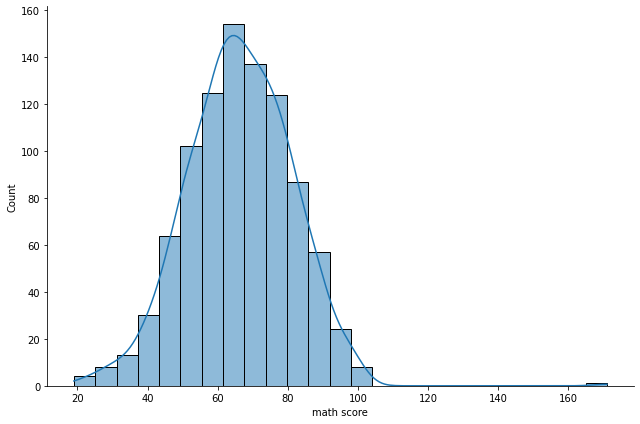

In [8]:
sns.displot(data=df['math score'],bins=25,height=6,kind='hist',aspect=1.5,kde=True)


In [9]:
help(sns.displot)

Help on function displot in module seaborn.distributions:

displot(data=None, *, x=None, y=None, hue=None, row=None, col=None, weights=None, kind='hist', rug=False, rug_kws=None, log_scale=None, legend=True, palette=None, hue_order=None, hue_norm=None, color=None, col_wrap=None, row_order=None, col_order=None, height=5, aspect=1, facet_kws=None, **kwargs)
    Figure-level interface for drawing distribution plots onto a FacetGrid.
    
    This function provides access to several approaches for visualizing the
    univariate or bivariate distribution of data, including subsets of data
    defined by semantic mapping and faceting across multiple subplots. The
    ``kind`` parameter selects the approach to use:
    
    - :func:`histplot` (with ``kind="hist"``; the default)
    - :func:`kdeplot` (with ``kind="kde"``)
    - :func:`ecdfplot` (with ``kind="ecdf"``; univariate-only)
    
    Additionally, a :func:`rugplot` can be added to any kind of plot to show
    individual observations.


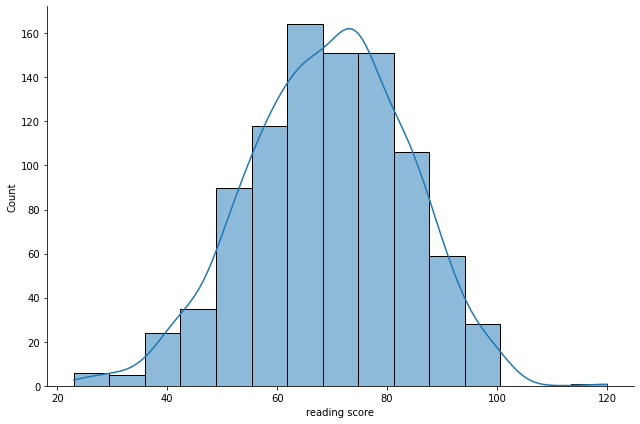

In [10]:
sns.displot(data=df['reading score'],bins=15,height=6,kind='hist',aspect=1.5,kde=True)

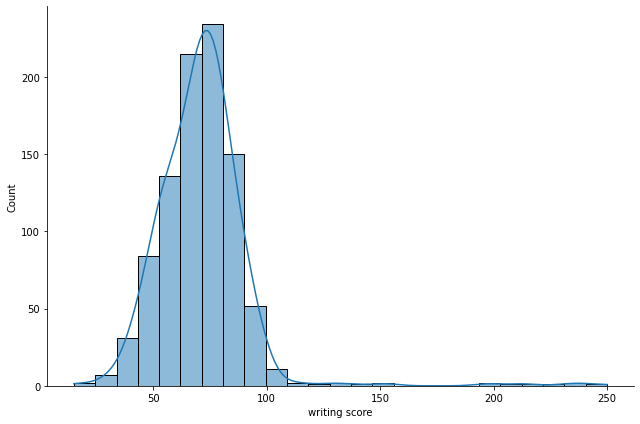

In [11]:
sns.displot(data=df['writing score'],bins=25,height=6,kind='hist',aspect=1.5,kde=True)

In [12]:
df1=df.copy()

# Handling outliers

<AxesSubplot:title={'center':'before trimming'}, xlabel='math score'>

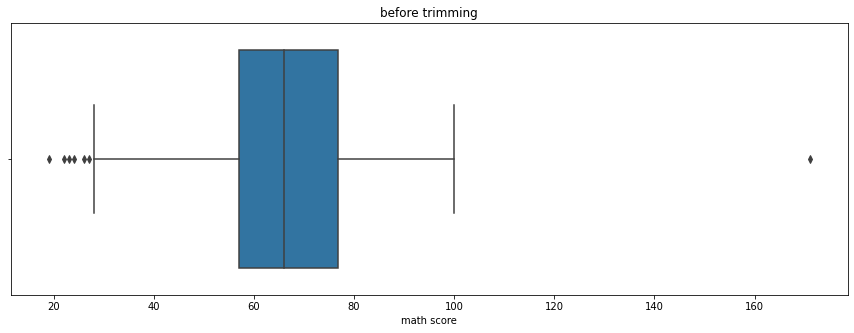

In [13]:
# handling outliers using virtualization
plt.figure(figsize=(15,5))
# plt.subplot(2,1,1)
# plt.gca().set_title('Before Trimming')
plt.title("before trimming")
sns.boxplot(data=df1,x=df1['math score'])


In [14]:
 df1=df1[(df1["math score"]>40) & (df1["math score"]<100)]

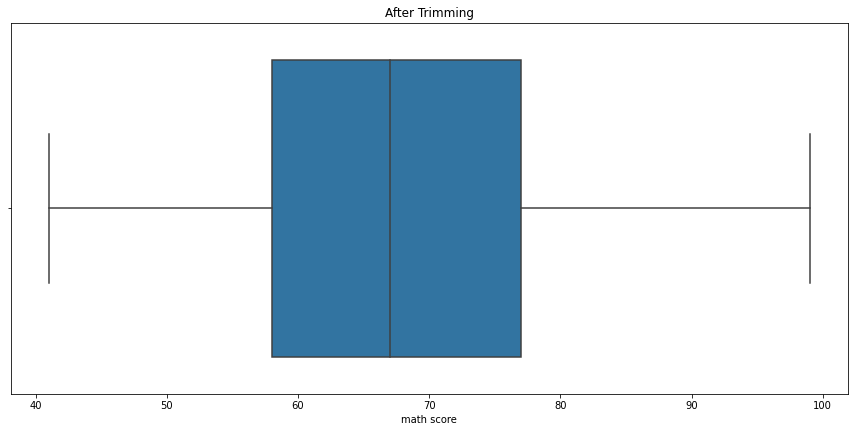

In [15]:
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
plt.gca().set_title('After Trimming')
sns.boxplot(data=df1,x='math score');

<AxesSubplot:title={'center':'Before Trimming'}, xlabel='writing score'>

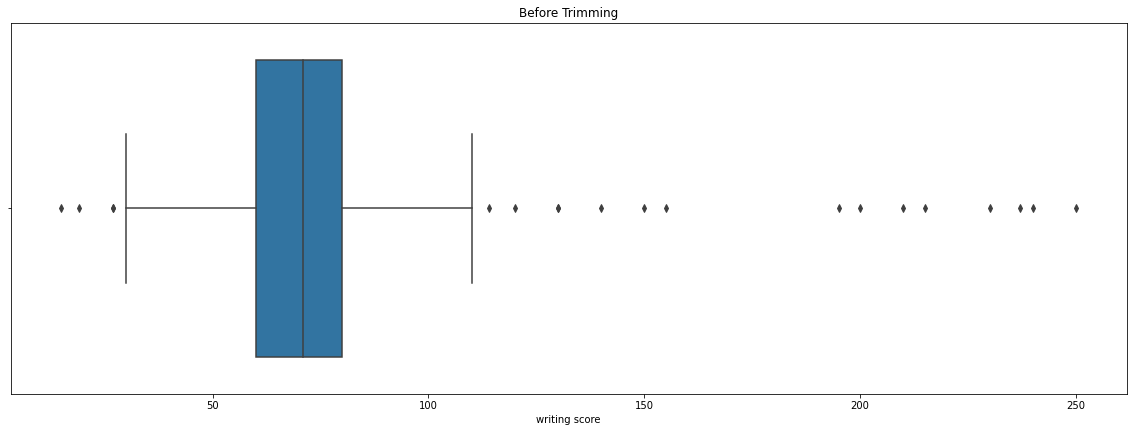

In [16]:
plt.figure(figsize=(20,15))
plt.subplot(2,1,1)
plt.gca().set_title('Before Trimming')
sns.boxplot(data=df,x=df['writing score'])

<AxesSubplot:title={'center':'After Trimming'}, xlabel='writing score'>

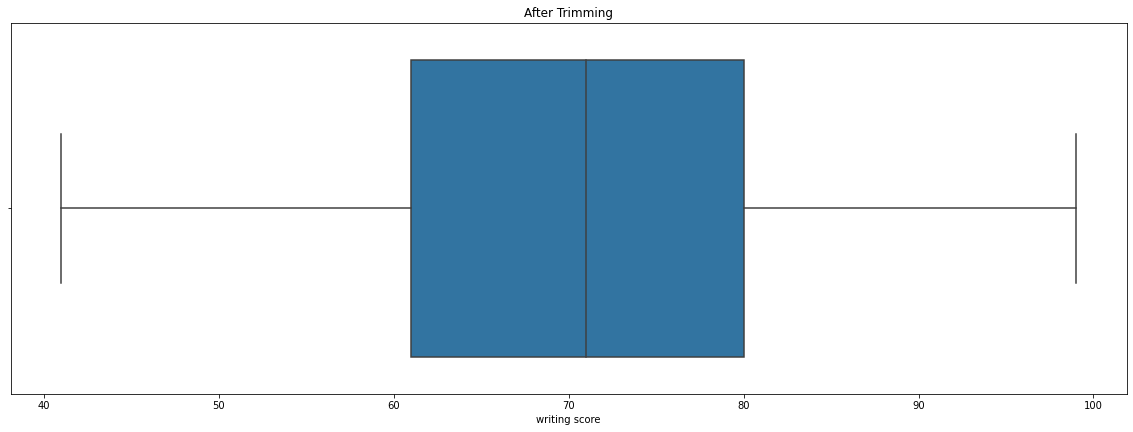

In [17]:
df1=df1[(df1['writing score']>40)&(df1['writing score']<100)]
plt.figure(figsize=(20,15))
plt.subplot(2,1,1)
plt.gca().set_title('After Trimming')
sns.boxplot(data=df,x=df1['writing score'])

<AxesSubplot:title={'center':'Before Trimming'}, xlabel='reading score'>

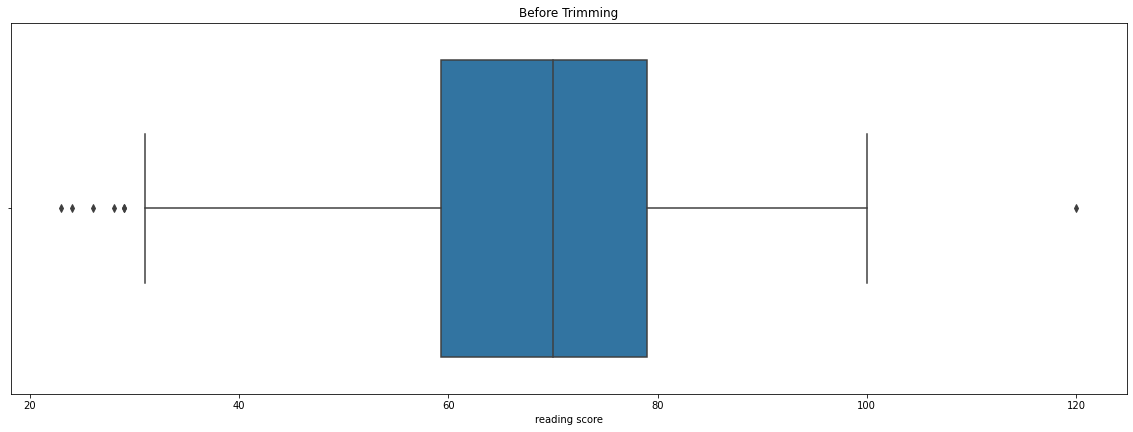

In [18]:
plt.figure(figsize=(20,15))
plt.subplot(2,1,1)
plt.gca().set_title('Before Trimming')
sns.boxplot(data=df,x=df['reading score'])

<AxesSubplot:title={'center':'After Trimming'}, xlabel='reading score'>

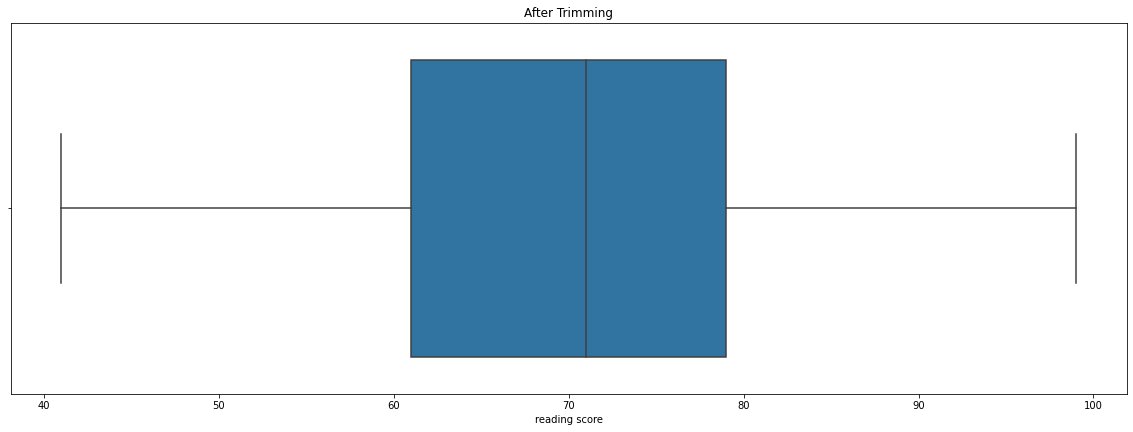

In [19]:
df1=df1[(df1['reading score']>40)&(df1['reading score']<100)]
plt.figure(figsize=(20,15))
plt.subplot(2,1,1)
plt.gca().set_title('After Trimming')
sns.boxplot(data=df,x=df1['reading score'])

In [20]:
# handling outliers using IQR
Q1 = df['math score'].quantile(0.25)
Q3 = df['math score'].quantile(0.75)


IQR = Q3-Q1

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(27.375, 106.375)

In [21]:
new_df=df.copy()

In [22]:
new_df=new_df[(new_df['math score']>lower_limit)&(new_df['math score']<upper_limit)]

In [23]:
Q1 = df['writing score'].quantile(0.25)
Q3 = df['writing score'].quantile(0.75)


IQR = Q3-Q1

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(30.0, 110.0)

In [24]:
from scipy import stats
x = stats.zscore(df['writing score'])
l = df['writing score'][(x<=3) | (x>=-3)]
print(l)

0      74.0
2      93.0
4      75.0
5      78.0
6      92.0
       ... 
992    76.0
993    74.0
995    95.0
997    65.0
999    86.0
Name: writing score, Length: 938, dtype: float64


In [25]:
new_df=new_df[(new_df['writing score']>lower_limit)&(new_df['writing score']<upper_limit)]

In [26]:
Q1 = df['reading score'].quantile(0.25)
Q3 = df['reading score'].quantile(0.75)

IQR = Q3-Q1

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(29.625, 108.625)

In [27]:
new_df=new_df[(new_df['reading score']>lower_limit)&(new_df['reading score']<upper_limit)]

<AxesSubplot:title={'center':'After Trimming'}, xlabel='reading score'>

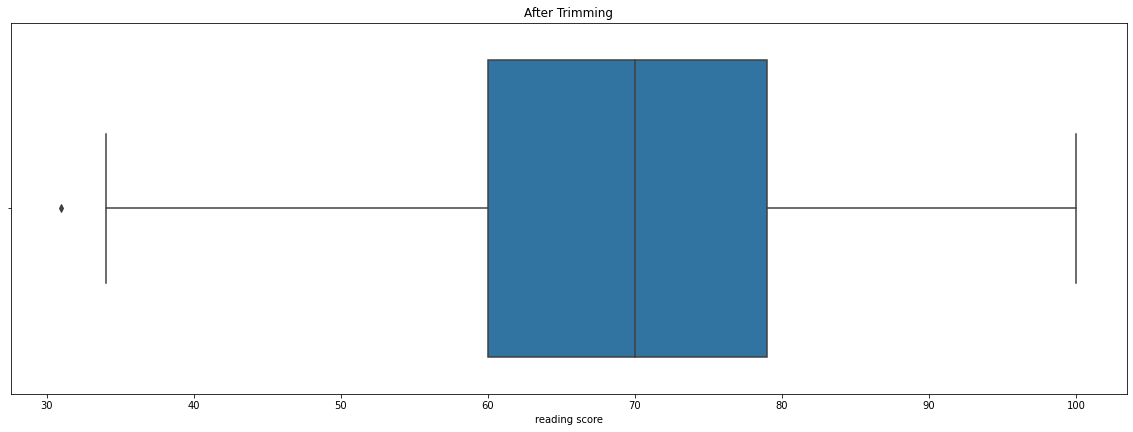

In [28]:
plt.figure(figsize=(20,15))
plt.subplot(2,1,1)
plt.gca().set_title('After Trimming')
sns.boxplot(data=df,x=new_df['reading score'])

# Transformation

In [29]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 909 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       909 non-null    object 
 1   race/ethnicity               909 non-null    object 
 2   parental level of education  909 non-null    object 
 3   lunch                        909 non-null    object 
 4   test preparation course      909 non-null    object 
 5   math score                   909 non-null    float64
 6   reading score                909 non-null    float64
 7   writing score                909 non-null    float64
dtypes: float64(3), object(5)
memory usage: 63.9+ KB


In [30]:
print("Math score skewness : ",new_df["math score"].skew())
print("Reading score skewness : ",new_df["reading score"].skew())
print("Writing score skewness : ",new_df["writing score"].skew())

Math score skewness :  -0.008625591050758802
Reading score skewness :  -0.0974380657725886
Writing score skewness :  -0.1497082109701648


<AxesSubplot:xlabel='math score', ylabel='Density'>

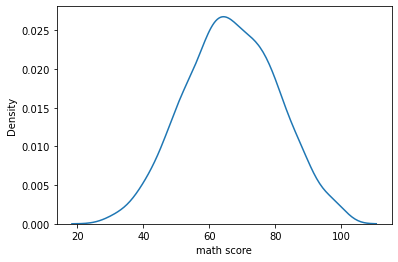

In [31]:
sns.kdeplot(new_df["math score"])

<AxesSubplot:xlabel='reading score', ylabel='Density'>

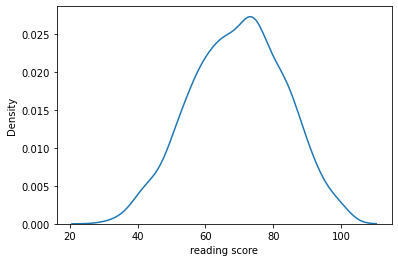

In [32]:
sns.kdeplot(new_df["reading score"])

<AxesSubplot:xlabel='writing score', ylabel='Density'>

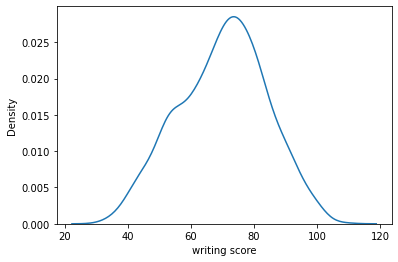

In [33]:
sns.kdeplot(new_df["writing score"])

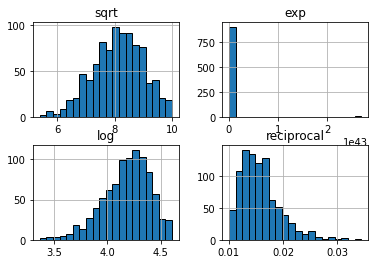

In [34]:
math_tr=new_df["math score"].transform([np.sqrt,np.exp,np.log,np.reciprocal])
# plt.figure(figsize=(10,10))
math_tr.hist(bins=20,layout=(2,2), edgecolor='k')
plt.show();

In [35]:
math_tr

,sqrt,exp,log,reciprocal
0,8.485281,1.858672e+31,4.276666,0.013889
2,9.486833,1.220403e+39,4.499810,0.011111
4,8.717798,1.014800e+33,4.330733,0.013158
5,8.426150,6.837671e+30,4.262680,0.014085
6,9.380832,1.651636e+38,4.477337,0.011364
...,...,...,...,...
992,7.416198,7.694785e+23,4.007333,0.018182
993,7.874008,8.438357e+26,4.127134,0.016129
995,9.380832,1.651636e+38,4.477337,0.011364
997,7.681146,4.201210e+25,4.077537,0.016949


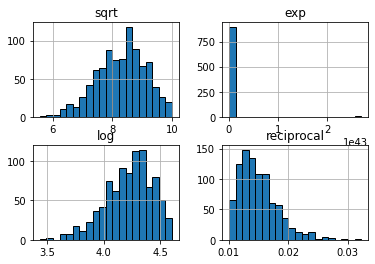

In [36]:
reading_tr=new_df["reading score"].transform([np.sqrt,np.exp,np.log,np.reciprocal])
reading_tr.hist(bins=20,layout=(2,2), edgecolor='k')
plt.show()

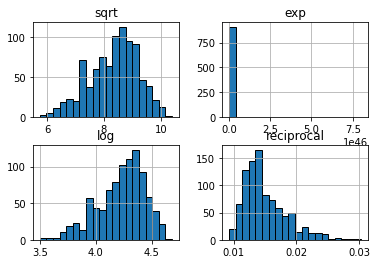

In [37]:
writing_tr=new_df["writing score"].transform([np.sqrt,np.exp,np.log,np.reciprocal])
writing_tr.hist(bins=20,layout=(2,2), edgecolor='k')
plt.show()

In [38]:
from sklearn.preprocessing import QuantileTransformer

In [39]:
scaler = QuantileTransformer(n_quantiles=len(new_df))
df2 = new_df.copy()
col_names = ['math score','reading score','writing score']
features = df2[col_names]

In [40]:
df2[col_names] = scaler.fit_transform(features.values)
df2[col_names].describe()

,math score,reading score,writing score
count,909.000000,909.000000,909.000000
mean,0.499733,0.499770,0.499612
std,0.289077,0.289153,0.289074
min,0.000000,0.000000,0.000000
25%,0.243392,0.252203,0.245044
50%,0.489537,0.491189,0.498899
75%,0.760463,0.743392,0.752753
max,1.000000,1.000000,1.000000


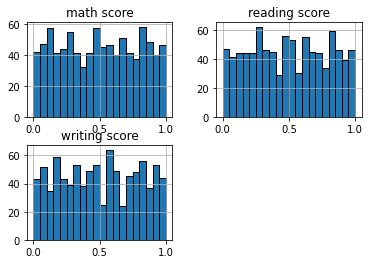

In [41]:
df2[col_names].hist(bins=20,layout=(2,2), edgecolor='k')
plt.title("Transformed math score")
plt.show()